# 3 Ways that Jupyter Notebooks Catalyze PyTecplot Scripting
Unlocking the true potential of data visualization and analysis is a paramount endeavor for every scientist and engineer. PyTecplot, Tecplot 360’s Python API, provides powerful automation capabilities to your visualizations and coupling it with Jupyter notebooks takes it to the next level. In this article, we’ll explore 3 ways that Jupyter Notebooks catalyze PyTecplot scripting. Whether you are a seasoned PyTecplot user or just utilizing it for the first time, this symbiotic relationship will empower your data analysis and visualization! 



## 1: Convenient Development of PyTecplot Scripts
Jupyter Notebooks are an excellent way to develop and debug PyTecplot scripts, especially in ‘connected’ mode!  The notebook's cell-based architecture allows developers to experiment with code snippets, execute them individually, and observe results in real-time. Check-out this simple PyTecplot code snippet in the Jupyter Notebook cell below:  

In [1]:
from os import path
import tecplot as tp

#tp.session.connect()

tp.new_layout()
datafile = path.join(tp.session.tecplot_examples_directory(), 'OneraM6wing', 'OneraM6_SU2_RANS.plt')
dataset = tp.data.load_tecplot(datafile)

This cell above is connecting to the Tecplot 360 GUI and opening the Onera wing example data set found in the 360 installation directory. In Tecplot 360, PyTecplot Connections have been turned-on (Scripting > PyTecplot Connections... > Accept Connections), and as the code is running, the plot in 360 updates in real time. The wing surface is plotted by default: 

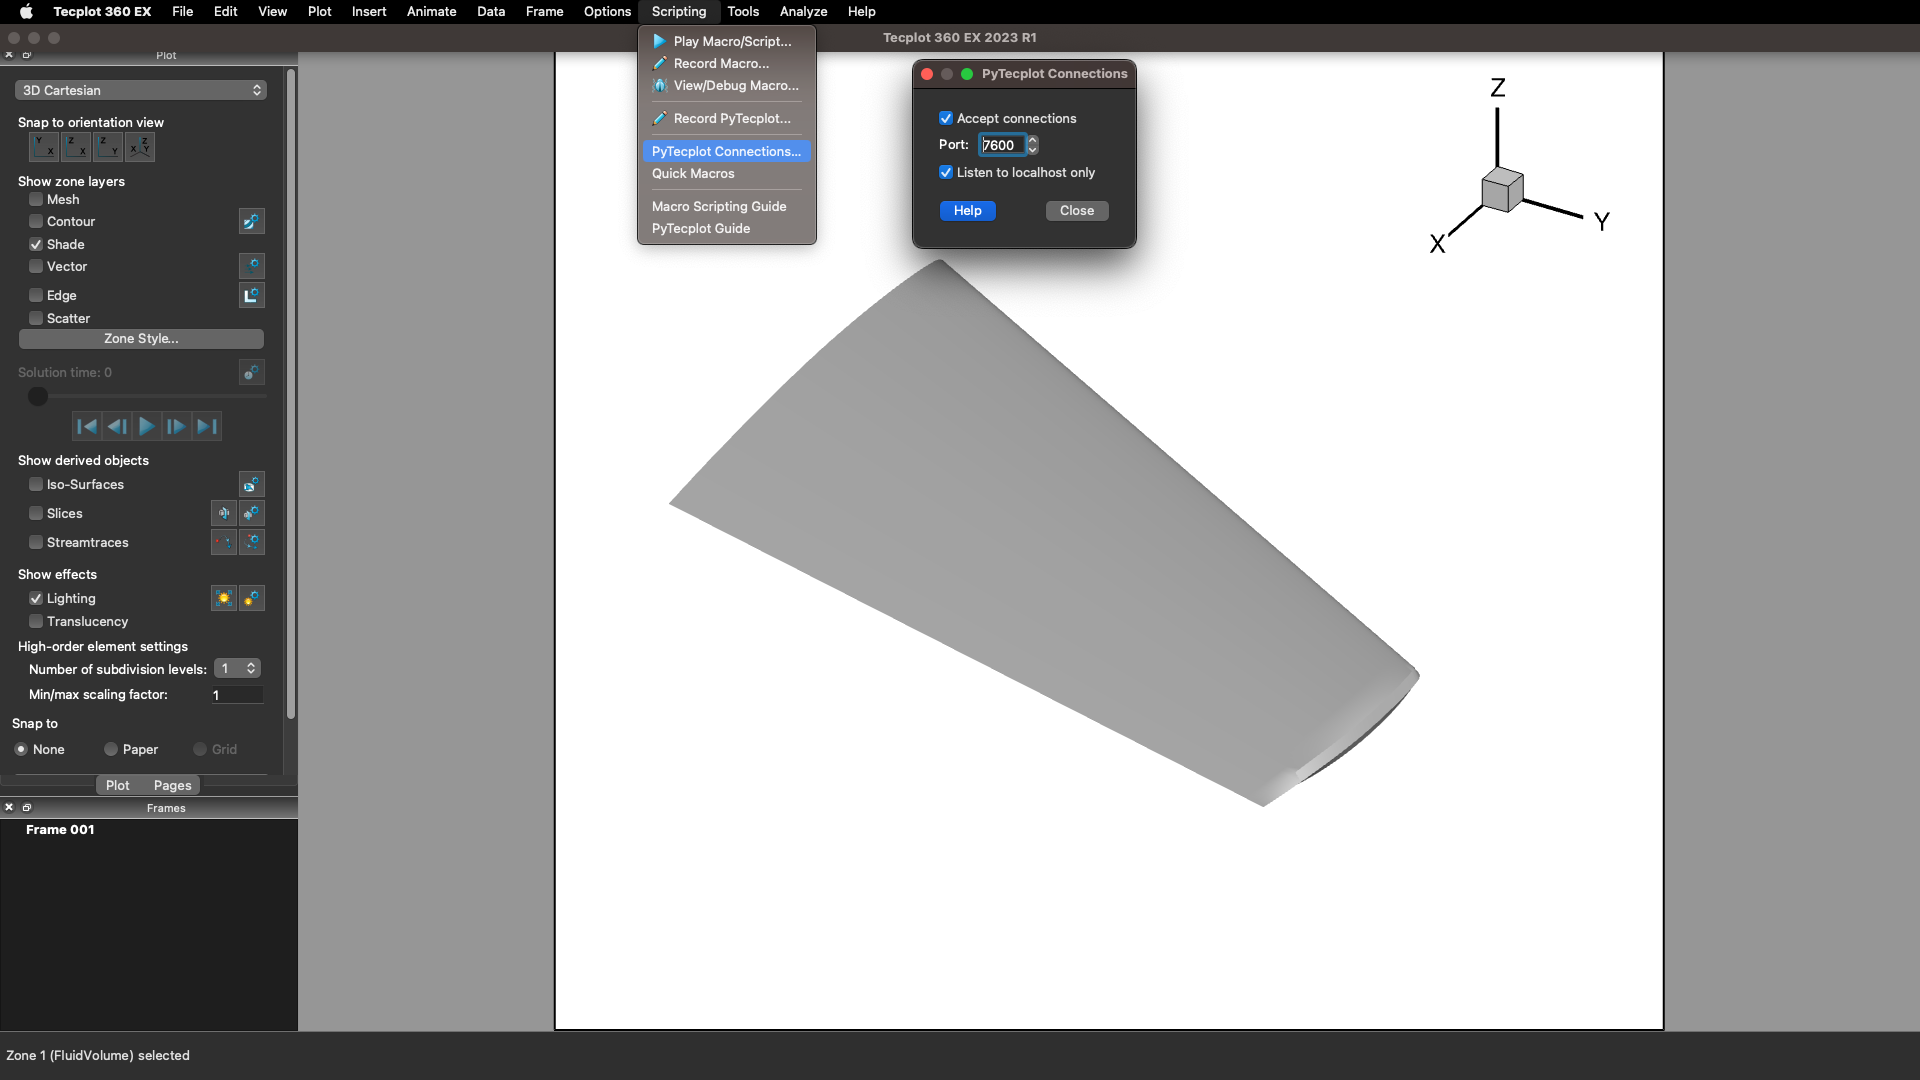

The interactivity in Jupyter notebooks fosters an iterative coding process, promoting rapid prototyping and quick iteration cycles. This is enhanced while connecting to Tecplot 360 where you get immediate visual feedback to your PyTecplot code inputs.  

Connecting to the Tecplot 360 GUI isn’t the only way to get immediate visual feedback though. You can also visualize your plots within Jupyter notebooks using ipython: 

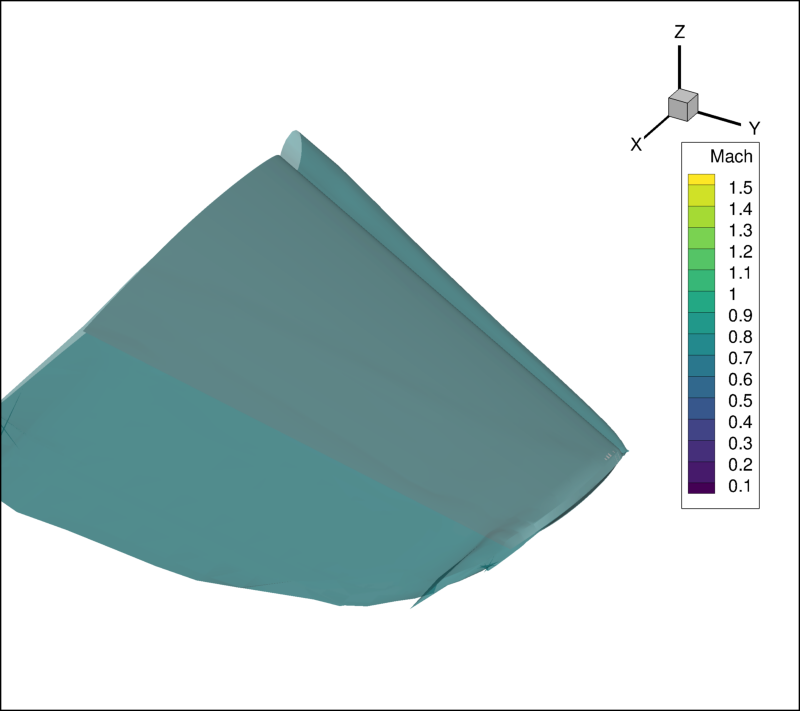

In [5]:
tp.extension.ipython.show(tp.active_frame(), 800)

For a video example of utilizing Jupyter Notebooks with PyTecplot, check-out this __[video](https://www.tecplot.com/2020/09/23/tecplot-360-basics-python-load-custom-file-formats/)__ at time ~10:20.

By visualizing outputs, intermediate variables, and data structures at each step with Jupyter Notebooks, developers can gain valuable insights into the inner workings of their PyTecplot code, making it easier to spot errors and optimize performance. In addition, the ability to mix code with rich text, visualizations, and comments in a single document (e.g. the document you’re now reading) ensures that developers can document their thought process, making it easier to revisit and share their work. For more examples of PyTecplot Jupyter Notebooks, see the __[Tecplot Jupyter Notebooks](https://github.com/Tecplot/handyscripts/tree/master/jupyter_notebooks)__ folder on GitHub.  



## 2: Jupyter Notebooks can be run “client-server” to access remote data 

Running a Jupyter notebook as a "client-server" setup allows you to conveniently leverage the powerful resources and data of a remote server from the browser of your local machine. This is particularly useful when dealing with large datasets or when your computing needs exceed the capabilities of your local hardware. Visualizations, analyses, and any computations will be executed on the remote server, utilizing its resources. For tips on how to go about setting up a remote server, see the details in these tutorials: 

- Running Jupyter Notebook on a remote server: https://docs.anaconda.com/free/anaconda/jupyter-notebooks/remote-jupyter-notebook/ 
- Jupyter Discourse: https://discourse.jupyter.org/t/running-notebooks-remotely/6616?u=fomightez 

Remember that security is crucial when setting up a client-server connection. Ensure you're using secure connections (SSH) and consider using authentication mechanisms to protect your data and server. 

## 3: Jupyter Notebooks and Packages Like ipywidgets to Create Interactive Notebooks 

Jupyter notebooks offer a versatile platform for integrating with various Python packages, including ipywidgets, to create interactive and dynamic notebooks. ipywidgets is a powerful library that allows you to add interactive widgets directly within Jupyter notebooks, enhancing the user experience and enabling more dynamic exploration and visualization of data. For example, we'll continue where we left off after loading the Onera wing data set by importing the interact class from the ipywidgets module, activating iso-surfaces for the plot and setting their translucency:

In [3]:
from ipywidgets import widgets, interact
from tecplot.constant import *

plot = tp.active_frame().plot()
plot.show_isosurfaces = True
iso = plot.isosurface(0)
iso.effects.use_translucency = True
iso.effects.surface_translucency = 50

In the next cell, we’ll set-up a function that sets the iso-surface group variable and renders an image of the plot in the Jupyter Notebook. Then, we’ll utilize interact() which will create an interactive slider which updates the iso-surface variable value dynamically.



In [4]:
def set_iso_value(Mach):  
    plot.contour(0).variable = dataset.variable('Mach')
    iso.isosurface_selection = IsoSurfaceSelection.OneSpecificValue
    iso.isosurface_values = Mach
    tp.extension.ipython.show(tp.active_frame(), 800)
interact(set_iso_value, Mach=(dataset.variable('Mach').min(),dataset.variable('Mach').max(),.1))

""" 
NOTE: If the slider widget doesn't show up below, restart Jupyter Notebooks after running this command on the command line:

    > jupyter nbextension enable --py widgetsnbextension

or you can install the ipywidgets module to Python using:

    > pip install ipywidgets

You may also need to install pillow:
    > pip install pillow
"""

interactive(children=(FloatSlider(value=0.7000000000000001, description='Mach', max=1.575580001), Output()), _…

" \nNOTE: If the slider widget doesn't show up below, restart Jupyter Notebooks after running this command on the command line:\n\n    > jupyter nbextension enable --py widgetsnbextension\n\nor you can install the ipywidgets module to Python using:\n\n    > pip install ipywidgets\n\nYou may also need to install pillow:\n    > pip install pillow\n"

Download this Jupyter notebook and try the slider out for yourself! 

Here is an example screen recording running the code in the cell above:

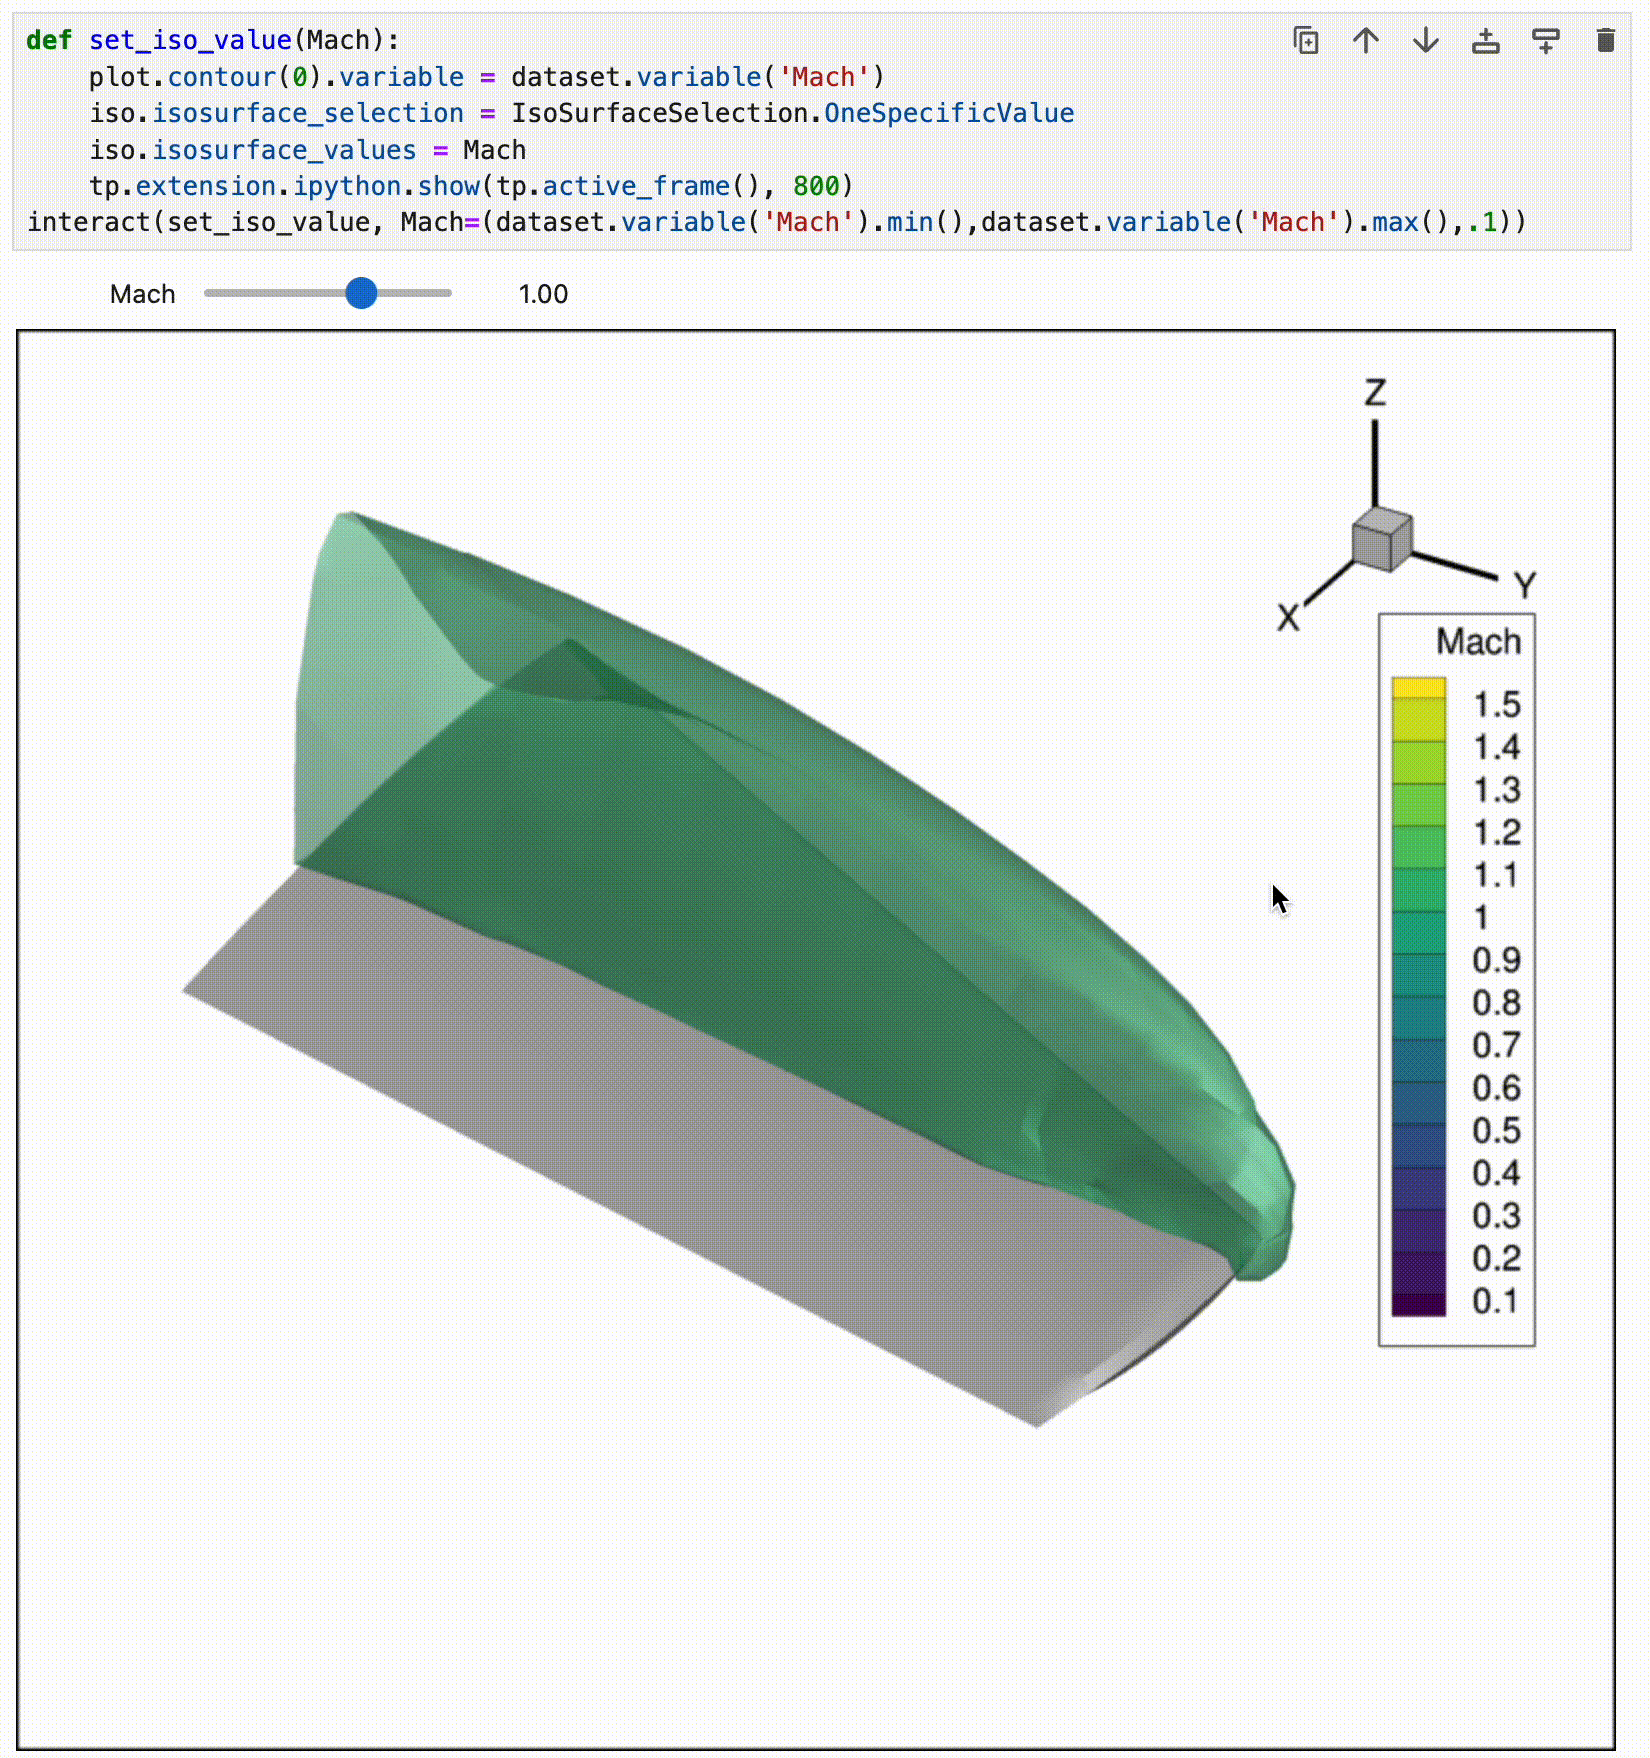

By integrating ipywidgets and other Python libraries into Jupyter notebooks, you can create interactive notebooks that engage users, allowing them to explore data, experiment with parameters, and gain deeper insights through dynamic visualizations and interactive controls. 

## Conclusion
Pytecplot coupled with Jupyter Notebooks creates a symbiotic relationship that catalyzes your PyTecplot scripting. Jupyter Notebooks help you develop and debug PyTecplot scripts, access resources and data remotely, and make your scripts interactive using other packages. 
 

### Bonus: #4 Jupyter Notebooks can be rendered in __[GitHub](https://github.com/Tecplot/handyscripts/tree/master/jupyter_notebooks)__ and __[webpages](https://nbviewer.org/)__ allowing you to easily communicate and publicize your visualizations! 

 

Tips:  

- If you run into an error such as “...Tecplot batch library or one of its dependencies could not be found...” try restarting your Jupyter Notebook with tec360-env (run your Jupyter notebook as you would Python). See more in the Environment Setup sections for __[Windows](https://tecplot.azureedge.net/products/pytecplot/docs/install.html#environment-setup)__, __[Linux](https://tecplot.azureedge.net/products/pytecplot/docs/install.html#environment-setup-batch-only)__, and __[macOS](https://tecplot.azureedge.net/products/pytecplot/docs/install.html#id22)__ in the PyTecplot Documentation. For example, on macOS, run Jupyter Notebooks like this: 
> ``` "/Applications/Tecplot 360 EX 2023 R1/bin/tec360-env" -- jupyter notebook ```

 

- How to get started with Jupyter Notebooks: 
    - Installation: https://docs.jupyter.org/en/latest/install/notebook-classic.html#alternative-for-experienced-python-users-installing-jupyter-with-pip 
    - Running: https://docs.jupyter.org/en/latest/running.html 